# Assignment 4 - Text Analysis

이번 과제에서는 주어진 텍스트를 분석하여 워드클라우드 그래프를 그린다.

* 제출 방법: ETL (11/6 자정까지)
* 파일 이름: A4-학번-이름(영어로).iphynb 형식으로 (예: A4-13403-999-jiyoon.iphynb)

### Dataset

주어진 데이터는 네이버에서 크롤링한 영화평이다.

데이터는 다음과 같이 구성되어 있다.

```
id	document	label
2190435	사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화	1
9279041	완전 감동입니다 다시봐도 감동	1
7865729	개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음	1
...
9327892	타임 루프 소재중 거의 최악. 감독과 작가부터 자기 반성의 시간을 갖자	0
9953525	이쪽 저쪽 ...어디서 본듯한...내용이 뒤죽박죽 순수창작물인지?	0
7744648	전기세가 아까운 영화!	0
```

데이터를 보면 알 수 있듯이 긍정적인 평은 label이 1,
부정적인 평은 label 이 0이다.



In [1]:
with open('naver_ratings.txt', 'r') as f:
    lines = f.read().splitlines()

pos_reviews = [] #positive review
neg_reviews = [] #negative review
for line in lines[1:]:
    slices = line.split('\t')
    if int(slices[2]): 
        pos_reviews.append(slices[1])
    else:
        neg_reviews.append(slices[1])

### Q1: 긍정적인 리뷰를 선별하고 random 하게 리뷰 1000개를 선택한 후 형용사의 wordcloud를 그리시오

VA Adjective

In [2]:
from konlpy.tag import Komoran
import numpy as np

reviews = pos_reviews
pick = np.random.choice(len(reviews), 1000, replace = False)

tagged_reviews = []
for reveiw_pick in pick:
    tagged_reviews.append(tagger.pos(reviews[reveiw_pick]))


adj_list = []
for review in tagged_reviews:    
    for word, tag in review:
        if tag in ['VA']:
            adj_list.append(word)
            
from collections import Counter
adj_counts = Counter(adj_list)
adj_counts.most_common()

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(width=900, height=600, 
                  font_path='08서울남산체 B.ttf',
                  background_color='white')

cloud = cloud.fit_words(adj_counts.items())

plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(cloud)
plt.show()

ImportError: No module named 'konlpy'

### Q2: 부정적인 리뷰를 선별하고 random 하게 리뷰 1000개를 선택한 후 형용사의 wordcloud를 그리시오

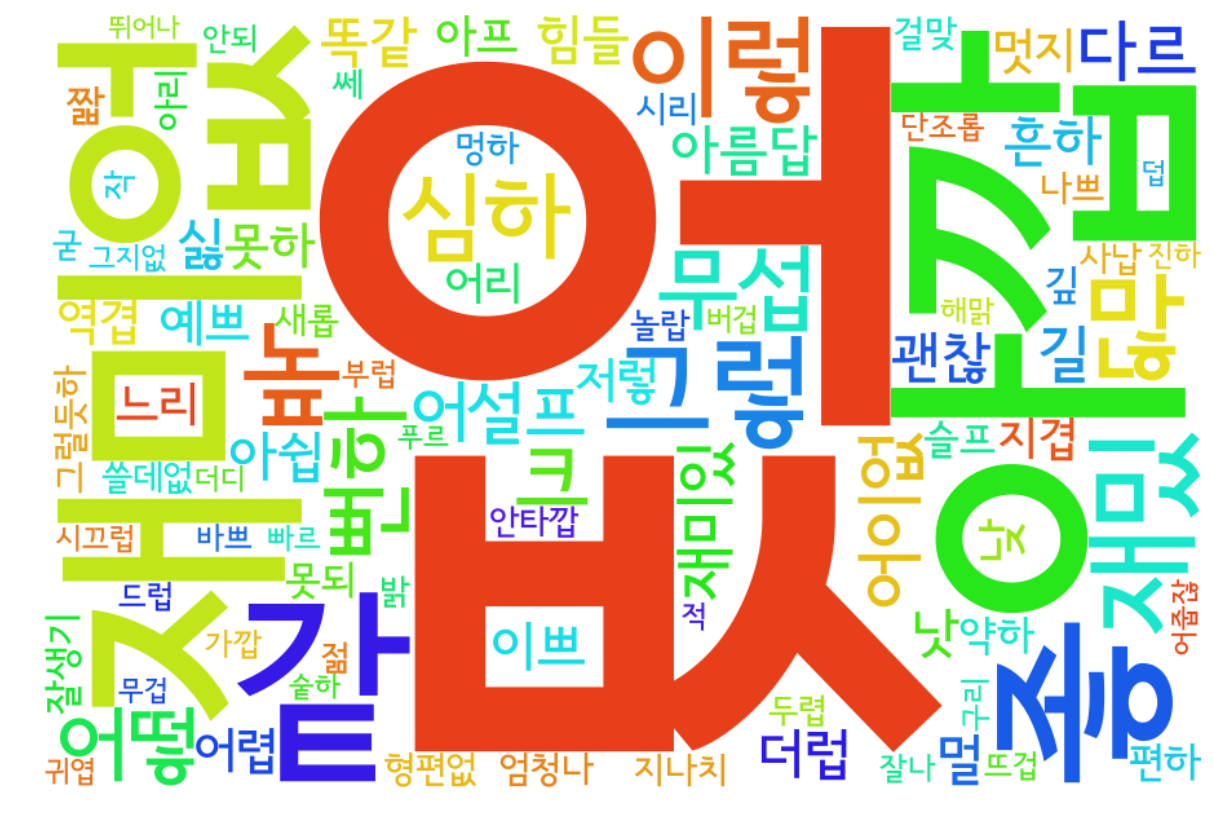

In [60]:
from konlpy.tag import Komoran
import numpy as np

reviews = neg_reviews

pick = np.random.choice(len(reviews), 1000, replace = False)
tagged_reviews = []
for reveiw_pick in pick:
    tagged_reviews.append(tagger.pos(reviews[reveiw_pick]))

adj_list = []
for review in tagged_reviews:    
    for word, tag in review:
        if tag in ['VA']:
            adj_list.append(word)
            
from collections import Counter
adj_counts = Counter(adj_list)
adj_counts.most_common()

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(width=900, height=600, 
                  font_path='08서울남산체 B.ttf',
                  background_color='white')

cloud = cloud.fit_words(adj_counts.items())

plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(cloud)
plt.show()